In [27]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import *
%matplotlib inline

In [28]:
# Import questions.csv

q = pd.read_csv('data/questions.csv')
q.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...


In [29]:
for i in range(10):
    print(q.questions_title.iloc[i], '\n', q.questions_body.iloc[i], '\n\n')

Teacher   career   question 
 What  is  a  maths  teacher?   what  is  a  maths  teacher  useful? #college #professor #lecture 


I want to become an army officer. What can I do to become an army officer? 
 I am Priyanka from Bangalore . Now am in 10th std . When I go to college I should not get confused on what I want to take to become army officer. So I am asking this question  #military #army 


Will going abroad for your first job increase your chances for jobs back home? 
 I'm planning on going abroad for my first job. It will be a teaching job and I don't have any serious career ideas. I don't know what job I would be working if I stay home instead so I'm assuming staying or leaving won't makeba huge difference in what I care about, unless I find something before my first job. I can think of ways that going abroad can be seen as good and bad. I do not know which side respectable employers willl side with. #working-abroad #employment- #overseas 


To become a specialist in busines

In [30]:
def fit_transform_output(cv, strs, label):
    X = cv.fit_transform(strs)
    k = X.shape[1]
    n = X.shape[0]
    print("\n\nUsing {}:\n".format(label))
    print('Vocabulary size:', k)
    print('Average non-zero features per example: {:0.1f}'.format((X.nnz)/n))
    print('Fraction of non-zero entries in matrix: {:0.2%}'.format(X.nnz/(k*n)))
    feat_names = cv.get_feature_names()
    counts = np.asarray(np.sum(X, axis = 0)).reshape(-1)
    print("Most common features:", 
          [x[0] for x in sorted(zip(feat_names, counts), key = lambda x: x[1], reverse = True)][:10])
    
    return X, feat_names

In [31]:
def pre_hashtags_only(s):
    out = []
    for w in s.strip().split(' '):
        if len(w) > 0:
            if w[0] == '#':
                out.append(w)
    return ' '.join(out)

In [32]:
cv = CountVectorizer(ngram_range = (2,3), stop_words = 'english')
X, f = fit_transform_output(cv, q.questions_body, '2 and 3-gram vocabulary')



Using 2 and 3-gram vocabulary:

Vocabulary size: 539429
Average non-zero features per example: 33.4
Fraction of non-zero entries in matrix: 0.01%
Most common features: ['high school', 'want know', 'like know', 'college major', 'don know', 'computer science', 'college college', 'career path', 'medical school', 'career counseling']


In [33]:
cv2 = CountVectorizer(preprocessor = pre_hashtags_only)
X2, f2 = fit_transform_output(cv2, q.questions_body, 'Hashtags only')



Using Hashtags only:

Vocabulary size: 5530
Average non-zero features per example: 3.7
Fraction of non-zero entries in matrix: 0.07%
Most common features: ['college', 'career', 'engineering', 'medicine', 'science', 'computer', 'school', 'business', 'major', 'education']


In [34]:
# Import questions_scores.csv

qs = pd.read_csv('data/question_scores.csv')
qs.head()

,id,score
0,38436aadef3d4b608ad089cf53ab0fe7,5
1,edb8c179c5d64c9cb812a59a32045f55,4
2,333464d7484b43e3866e86096bc4ddb9,6
3,4b995e60b99d4ee18346e893e007cb8f,6
4,f6b9ca94aed04ba28256492708e74f60,6


In [35]:
qs['score_clean'] = qs.score.apply(lambda x: x if x <= 15 else 16)

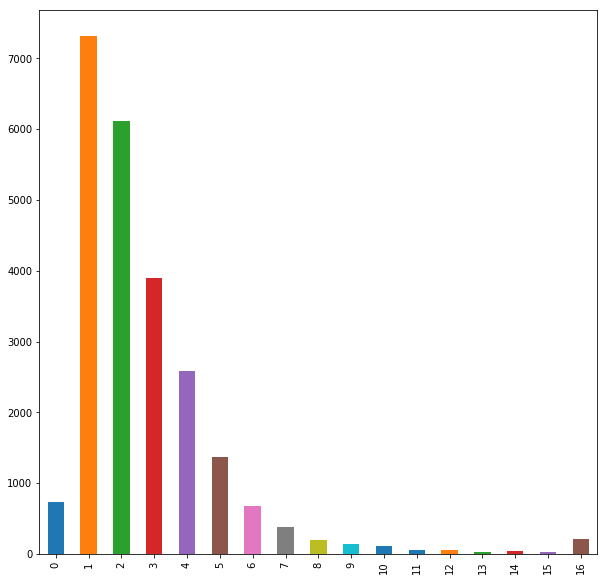

In [36]:
fig, ax = plt.subplots(figsize = (10,10))

qs.score_clean.value_counts().sort_index().plot.bar(ax = ax)

plt.show()

In [37]:
# Import answers.csv

a = pd.read_csv('data/answers.csv')
a.head()

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...


In [38]:
for i in range(10):
    print(a.answers_body.iloc[i], '\n\n')

<p>Hi!</p>
<p>You are asking a very interesting question.  I am giving you two sites that will give you some of an explanation that may answer your question.</p>
<p>http://mathforum.org/dr.math/faq/faq.why.math.html</p>
<p>http://www.mathworksheetscenter.com/mathtips/mathissoimportant.html</p>
<p>Let me know if this helps</p> 


<p>Hi. I joined the Army after I attended college and received a Bachelor's Degree in Criminal Justice.  Commissioned officers enter the Military with a four year degree or receive officer training after joining and complete a tour. You can prepare yourself by taking Reserve Officer Training Corps (ROTC) while in high school or a university. You can also attend Officer Candidate School (OCS) after graduating from college or become commissioned by earning a professional degree. If you decide to earn a degree, think about what you would like to do while in the military.  The experience in the military was very rewarding. I wish you well and much success in your f

In [39]:
def pre_remove_html(s):
    s = re.sub('<.{1,2}>', '', s)
    return s

In [40]:
cv = CountVectorizer(ngram_range = (2,3), preprocessor = pre_remove_html, stop_words = 'english')
X, f = fit_transform_output(cv, a.answers_body.values.astype(str), '2 and 3-gram vocabulary')



Using 2 and 3-gram vocabulary:

Vocabulary size: 4780593
Average non-zero features per example: 143.8
Fraction of non-zero entries in matrix: 0.00%
Most common features: ['Good luck', 'high school', 'https www', 'http www', 'lt span', 'Best luck', 'make sure', 'For example', 'You need', 'lt span gt']


In [41]:
# Import questions_scores.csv

a_s = pd.read_csv('data/answer_scores.csv')
a_s.head()

,id,score
0,7b2bb0fc0d384e298cffa6afde9cf6ab,1
1,7640a6e5d5224c8681cc58de860858f4,5
2,3ce32e236fa9435183b2180fb213375c,2
3,fa30fe4c016043e382c441a7ef743bfb,0
4,71229eb293314c8a9e545057ecc32c93,2


In [44]:
a_s['score_clean'] = a_s.score.apply(lambda x: x if x <= 8 else 9)

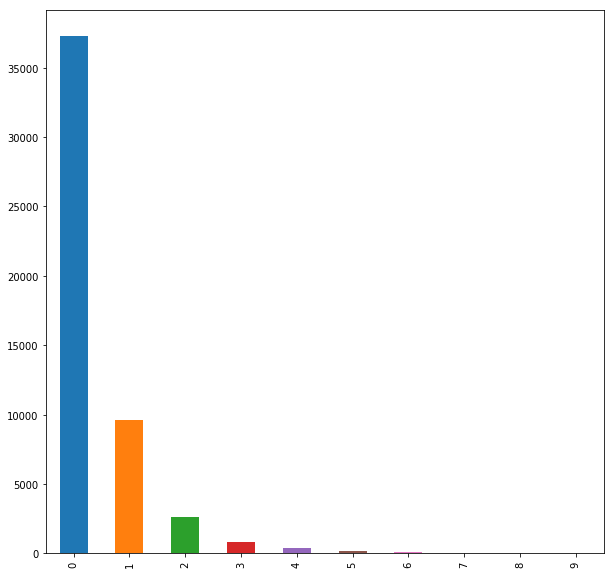

In [45]:
fig, ax = plt.subplots(figsize = (10,10))

a_s.score_clean.value_counts().sort_index().plot.bar(ax = ax)

plt.show()